# Updated Scoring System

----

Looking at the scores from the original system, they appeared to be approximating an exponential function.  So I came up with such an equation.  This simplifies things such that: 

* IL and RTA runs have the same scoring algorithm
* Benchmark and standard times are no longer necessary
* Course difficulty is implicitly represented
* There are fewer variables that can change the score curve

For each course, the curve depends only on the world record time and the median time from all submissions.  The only way the curve changes is if either of these variables change (new WR, new players, players crossing the median threshold).  The $\alpha$ and $\beta$ parameters are static scores where $\alpha$ determines the points awarded to 1st place (e.g. $\alpha = 10$ for 3 Lap or $\alpha = 5$ for 1 Lap) and $\beta$ determines the points awarded to the median time (meaning that the median score is anchored and will always stay the same even if the median time changes).  

\begin{equation}
    \text{score} = \alpha \exp\left(\ln \beta~~ \frac{\text{median} - \text{1st place}}{t-\text{1st place}}\right)
\end{equation}

# Comparison

-----

Setting $\beta = \frac{1}{6}$ and $\alpha$ to the category weights from the original system produces similar results to the old system.  Here are a couple of IL courses for comparison:

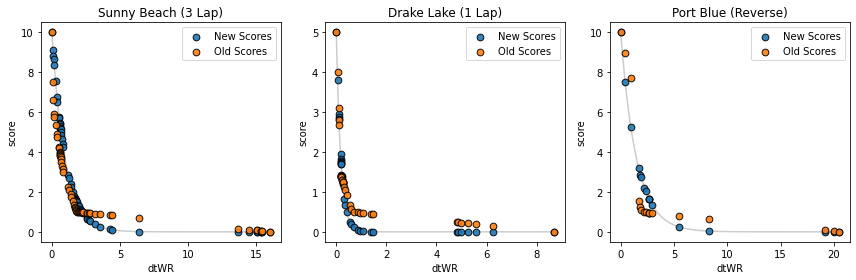

In [2]:
from waveracepy import *
demonstrate.old_v_new()

Here is a comparison of the curves for IL levels.  The algorithm sees Marine Fortress (3 Lap) and Port Blue (Reverse) as more difficult than Sunny Beach (3 Lap) and Drake Lake (Reverse), respectively.  This is because the former have median times that are much closer to the world record time than the latter.  The point is, that different course can have different scoring trajectories.

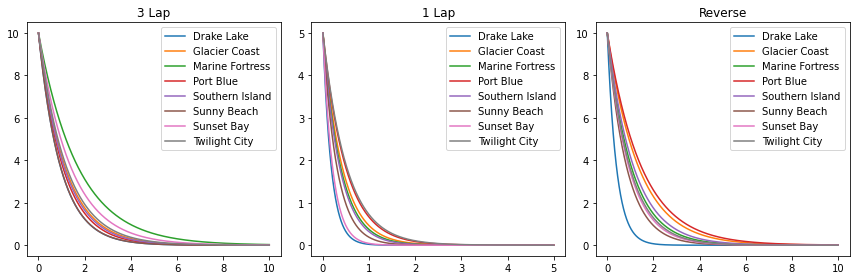

In [3]:
demonstrate.compare_curves()

## Top Players

The new scoring system actually yields the same Top 10 as the old scoring system for 2021(Q4).  I thought it would be interesting to look at the distribution of run scores for the top players:

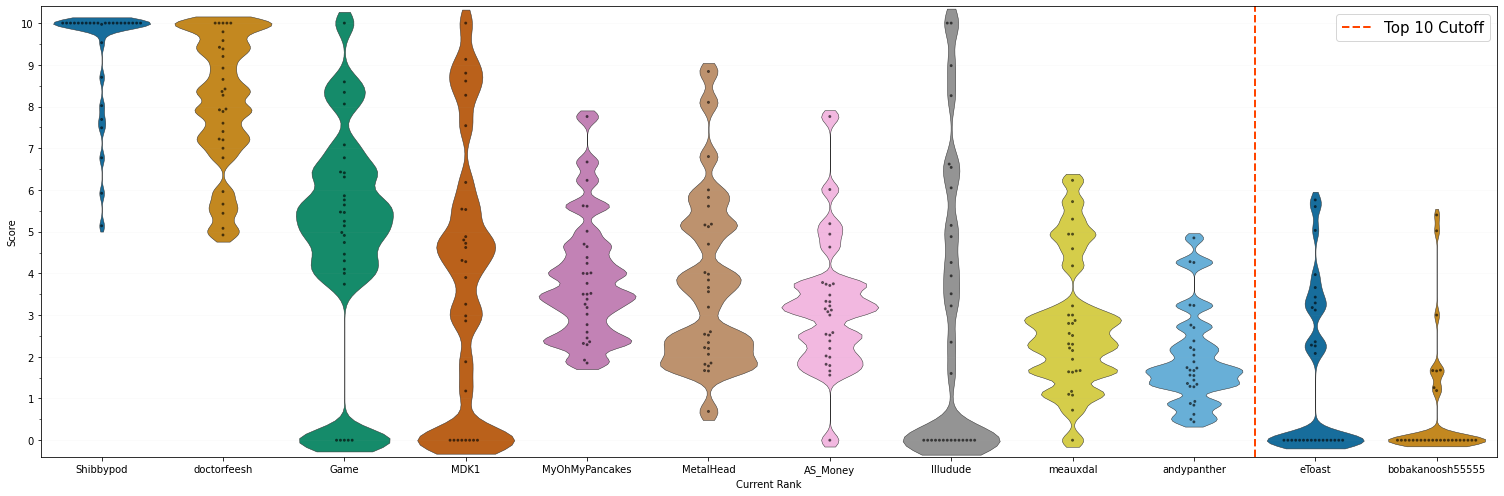

In [5]:
demonstrate.compare_t10('2022-01-01')

In general, there appears to be three types of players represented in the Top 10...

1. Elite players (Shibbypod, doctorfeesh) have a top-heavy distribution and a high floor
2. Extreme players (Game, MDK1, Illudude) have a wide distribution including some elite scores and some missing or struggle courses as compared to the elite players.
3. Solid players (MyOhMyPancakes, MetalHead, AS_Money, meauxdal, andypanther) tend to have nearly complete sheets and are consistently good at nearly all courses (few highs, few lows)

And because I can't help myself, here is what the Top 10 looks like for 2022(Q1).  MyOhMyPancakes gets back to 4th ahead of MDK1.  Q2 could be interesting once MDK1 gets back in the game.  Also, Hayate1017 replaces andypanther for 10th (another 'Extreme' player).  Curious to see how this compares to the official rankings if we get those soon.

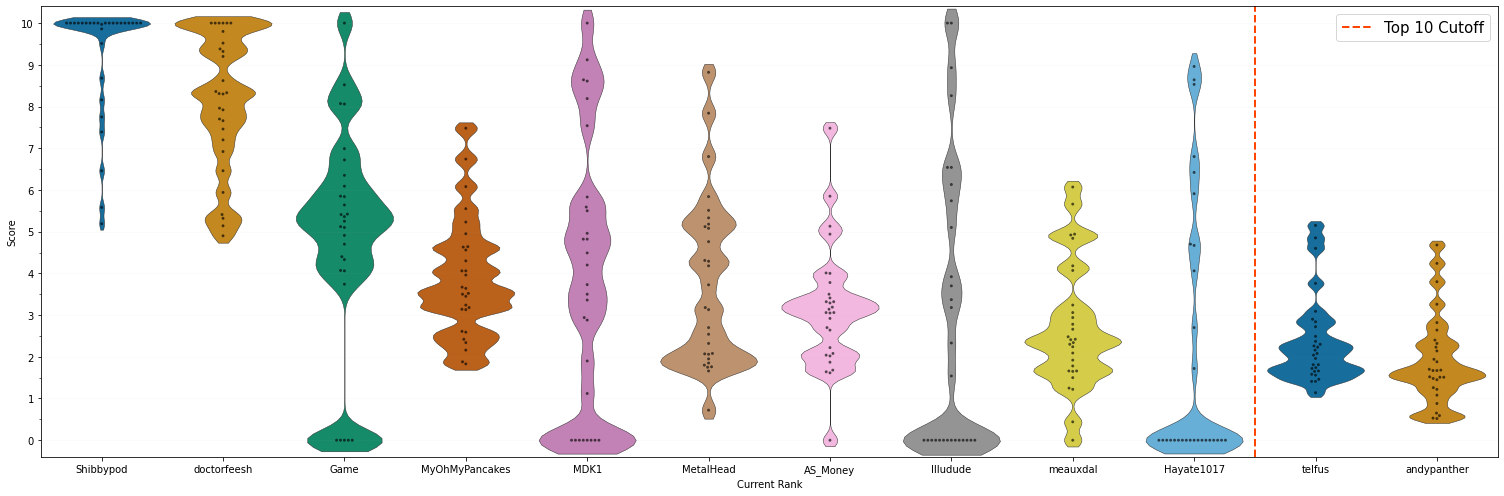

In [6]:
demonstrate.compare_t10('2022-04-01')